In [1]:
from dask import dataframe as dd

In [2]:
%%time
import datetime
import os
from tqdm import tqdm



Wall time: 7 ms


In [3]:


%%time
def time_exe():
    now = datetime.datetime.now()
    print (now.strftime("%Y-%m-%d %H:%M:%S"))

Wall time: 0 ns


In [4]:
time_exe()


2020-07-04 12:47:29


In [5]:
def chunk_filtering_yearwise_data(data_):
    return data_[(data_[5]>1994) & (data_[5] <2006)]

In [6]:


%%time
onemb ='googlebooks-eng-all-5gram-20120701-xq'
onegb ='googlebooks-eng-all-5gram-20120701-gu'


Wall time: 0 ns


In [7]:
dfd = dd.read_csv(onegb,
                            sep='\s+',
                            header=None, blocksize=64000000,error_bad_lines=False,
                            encoding='utf-8',engine='python')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
%%time
dfd_95_2005 = dfd[(dfd[5]>1994) &(dfd[5]<2006)].compute()

Wall time: 6min 15s


# word count for each year

In [10]:
%%time
#year_count  = dfd_95_2005[5].value_counts().compute()
year_count  = dfd_95_2005[5].value_counts()


Wall time: 65 ms


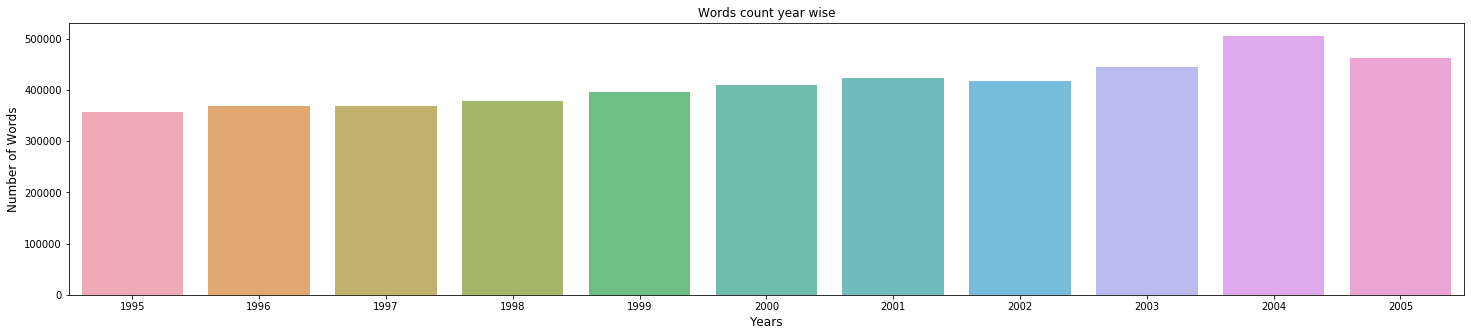

In [11]:
plt.figure(figsize=(25,5))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Words count year wise')
plt.ylabel('Number of Words', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

In [12]:
def split_data_year_wise(startyear,stopyear,yearsetp,basepath):
    print("start time")
    time_exe()
    stopyear= stopyear+1
    for i in range(startyear, stopyear, yearsetp):
        year_dd = dfd[dfd[5]==i]
        path = os.path.join(basepath,str(i),onegb)
        if not os.path.exists(path):
            os.makedirs(path)
        print("{}=>{}".format(i,path))
        year_dd.to_parquet(path,engine='pyarrow')
        #year_dd.to_csv(path)
        del year_dd
    print("finisheed time")
    time_exe()


In [13]:
start = 1995
end = 2005
step = 1

In [14]:
folderpath = 'yearwise'

In [15]:
split_data_year_wise(start,end,step,folderpath)

start time
2020-07-04 12:53:46
1995=>yearwise\1995\googlebooks-eng-all-5gram-20120701-gu
1996=>yearwise\1996\googlebooks-eng-all-5gram-20120701-gu
1997=>yearwise\1997\googlebooks-eng-all-5gram-20120701-gu
1998=>yearwise\1998\googlebooks-eng-all-5gram-20120701-gu
1999=>yearwise\1999\googlebooks-eng-all-5gram-20120701-gu
2000=>yearwise\2000\googlebooks-eng-all-5gram-20120701-gu
2001=>yearwise\2001\googlebooks-eng-all-5gram-20120701-gu
2002=>yearwise\2002\googlebooks-eng-all-5gram-20120701-gu
2003=>yearwise\2003\googlebooks-eng-all-5gram-20120701-gu
2004=>yearwise\2004\googlebooks-eng-all-5gram-20120701-gu
2005=>yearwise\2005\googlebooks-eng-all-5gram-20120701-gu
finisheed time
2020-07-04 14:08:41
